In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


In [2]:
import pandas as pd
import os
import datetime as dt

# Directorio donde se encuentran los archivos
directory = 'directory'

# Obtener la lista de archivos en la carpeta
file_list = [f for f in os.listdir(directory) if f.endswith('.txt')]

# Fechas de inicio y fin para el filtro
start_date = dt.datetime(2000, 4, 1)
end_date = dt.datetime(2003, 4, 1)

# Función para leer y filtrar un dataframe
def read_and_filter_txt(file_path, start_date, end_date):
    df = pd.read_csv(file_path, delimiter=',')
    # Convertir la columna 'Date' a datetime
    df['Date'] = pd.to_datetime(df['Date'])
    # Establecer la columna 'Date' como índice
    df.set_index('Date', inplace=True)
    # Filtrar el dataframe por el rango de fechas
    filtered_df = df.loc[start_date:end_date]
    return filtered_df

# Leer y filtrar cada archivo en un dataframe y almacenarlos en un diccionario
dataframes = {}
for file in file_list:
    file_path = os.path.join(directory, file)
    df = read_and_filter_txt(file_path, start_date, end_date)
    # Asignar el dataframe al diccionario con el nombre del archivo (sin extensión) como clave
    file_name = os.path.splitext(file)[0]
    dataframes[file_name] = df

# Verificar los dataframes
for name, df in dataframes.items():
    print(f"DataFrame for {name}:\n{df.head()}\n")

# Acceder a un dataframe específico por su nombre
data = dataframes.get('amzn.us', None)
if data is not None:
    print(data.head())
else:
    print("El dataframe no se encontró.")



DataFrame for nvda.us:
              Open    High     Low   Close   Volume  OpenInt
Date                                                        
2000-04-03  6.4761  6.4947  5.8545  6.0217  2236275        0
2000-04-04  6.3367  6.4481  4.4070  5.7987  3461766        0
2000-04-05  5.8545  7.5429  5.5576  7.0883  4313144        0
2000-04-06  7.4226  7.7934  7.0604  7.4226  2730675        0
2000-04-07  7.7934  8.1183  7.4595  7.9326  2152852        0

DataFrame for aapl.us:
              Open    High     Low   Close     Volume  OpenInt
Date                                                          
2000-04-03  4.3388  4.4667  4.1442  4.2682   91630718        0
2000-04-04  4.2465  4.2579  3.7381  4.0759  184154733        0
2000-04-05  4.0479  4.2542  3.9699  4.1735  127635173        0
2000-04-06  4.1827  4.3056  3.9456  4.0083   72405631        0
2000-04-07  4.0736  4.2222  4.0186  4.2185   67611060        0

DataFrame for amzn.us:
             Open   High    Low  Close    Volume  OpenInt
Dat

In [3]:
# Setting 80 percent data for training
training_data_len = math.ceil(len(data) * .8)
training_data_len 
 
#Splitting the dataset
train_data = data[:training_data_len].iloc[:,:1] 
test_data = data[training_data_len:].iloc[:,:1]
print(train_data.shape, test_data.shape)


(599, 1) (149, 1)


In [4]:
# Selecting Open Price values
dataset_train = train_data.Open.values 
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1)) 
dataset_train.shape


(599, 1)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)

print(scaled_train[:5])



[[0.97049234]
 [0.92875774]
 [0.91033583]
 [0.93788719]
 [0.96527551]]


In [6]:
# Selecting Open Price values
dataset_test = test_data.Open.values 
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1)) 
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test) 
print(*scaled_test[:5])

[0.04593373] [0.00376506] [0.] [0.03614458] [0.02108434]


In [7]:

X_train = []
y_train = []
for i in range(50, len(scaled_train)):
    X_train.append(scaled_train[i-50:i, 0])
    y_train.append(scaled_train[i, 0])
    if i <= 51:
        print(X_train)
        print(y_train)
        print()

X_trainS = []
y_trainS = []
for i in range(50, len(scaled_train)):
    X_trainS.append(scaled_train[i-5:i, 0])
    y_trainS.append(scaled_train[i, 0])
    if i <= 51:
        print(X_trainS)
        print(y_trainS)
        print()


[array([0.97049234, 0.92875774, 0.91033583, 0.93788719, 0.96527551,
       1.        , 0.92256276, 0.94701663, 0.84724486, 0.68421911,
       0.64134333, 0.67998044, 0.80534724, 0.77388327, 0.70867297,
       0.74828823, 0.77274209, 0.70753179, 0.78399087, 0.81659602,
       0.86860124, 0.80436909, 0.78806651, 0.79409847, 0.82980111,
       0.82474731, 0.79263124, 0.78301272, 0.79523965, 0.77779589,
       0.83485491, 0.83599609, 0.8880013 , 0.79409847, 0.76768829,
       0.72693186, 0.6607434 , 0.71062928, 0.65764591, 0.67492664,
       0.7310075 , 0.70052168, 0.7575807 , 0.80078252, 0.78399087,
       0.74942941, 0.76051516, 0.75040756, 0.75448321, 0.68927291])]
[0.7075317900228236]

[array([0.97049234, 0.92875774, 0.91033583, 0.93788719, 0.96527551,
       1.        , 0.92256276, 0.94701663, 0.84724486, 0.68421911,
       0.64134333, 0.67998044, 0.80534724, 0.77388327, 0.70867297,
       0.74828823, 0.77274209, 0.70753179, 0.78399087, 0.81659602,
       0.86860124, 0.80436909, 0.788

In [8]:
X_test = []
y_test = []
for i in range(50, len(scaled_test)):
	X_test.append(scaled_test[i-50:i, 0])
	y_test.append(scaled_test[i, 0])
X_testS = []
y_testS = []
for i in range(50, len(scaled_test)):
	X_testS.append(scaled_test[i-5:i, 0])
	y_testS.append(scaled_test[i, 0])


In [9]:
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

# The data is converted to Numpy array
X_trainS, y_trainS = np.array(X_trainS), np.array(y_trainS)

#Reshaping
X_trainS = np.reshape(X_trainS, (X_trainS.shape[0], X_trainS.shape[1],1))
y_trainS = np.reshape(y_trainS, (y_trainS.shape[0],1))
print("X_train :",X_trainS.shape,"y_train :",y_trainS.shape)


X_train : (549, 50, 1) y_train : (549, 1)
X_train : (549, 5, 1) y_train : (549, 1)


In [10]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)

# The data is converted to numpy array
X_testS, y_testS = np.array(X_testS), np.array(y_testS)

#Reshaping
X_testS = np.reshape(X_testS, (X_testS.shape[0], X_testS.shape[1],1))
y_testS = np.reshape(y_testS, (y_testS.shape[0],1))
print("X_testS :",X_testS.shape,"y_testS :",y_testS.shape)


X_test : (99, 50, 1) y_test : (99, 1)
X_testS : (99, 5, 1) y_testS : (99, 1)


In [11]:

# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error


2024-05-31 17:10:37.649891: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-31 17:10:38.631849: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [12]:
# initializing the RNN
regressor = Sequential()

# adding RNN layers and dropout regularization
regressor.add(SimpleRNN(units = 50, 
						activation = "tanh",
						return_sequences = True,
						input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, 
						activation = "tanh",
						return_sequences = True))

regressor.add(SimpleRNN(units = 50,
						activation = "tanh",
						return_sequences = True))

regressor.add( SimpleRNN(units = 50))

# adding the output layer
regressor.add(Dense(units = 1,activation='sigmoid'))

# compiling RNN
regressor.compile(optimizer = SGD(learning_rate=0.01,
								decay=1e-6, 
								momentum=0.9, 
								nesterov=True), 
				loss = "mean_squared_error")

# fitting the model
regressor.fit(X_train, y_train, epochs = 20, batch_size = 1)
regressor.summary()


Epoch 1/20


2024-05-31 17:10:40.622399: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-31 17:10:40.660331: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/mguzman/venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/mguzman/venv/lib/python3.10/site-packages/keras/src/optimizers/base_optim

549/549 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - loss: 0.0346
Epoch 2/20
549/549 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - loss: 0.0041
Epoch 3/20
549/549 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - loss: 0.0029
Epoch 4/20
549/549 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step - loss: 0.0021
Epoch 5/20
549/549 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - loss: 0.0017
Epoch 6/20
549/549 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - loss: 0.0019
Epoch 7/20
549/549 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - loss: 0.0020
Epoch 8/20
549/549 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - loss: 0.0020
Epoch 9/20
549/549 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - loss: 0.0021
Epoch 10/20
549/549 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step - loss: 0.0020
Epoch 11/20
549/549 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step - loss: 0.0015
Epoch 12/20
549/549 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - loss: 0.0017
Epoch 13/20
549/549 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - loss: 0.0017
Epoch 14/20
549/549 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - loss: 0.0015
Epoch 15/20
549/549 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 50, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 50, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,604 (139.08 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,803 (69.55 KB)

In [13]:
#Initialising the model
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(50, 
					return_sequences = True, 
					input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(50, 
					return_sequences = False))
regressorLSTM.add(Dense(25))

#Adding the output layer
regressorLSTM.add(Dense(1))

#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
					loss = 'mean_squared_error',
					metrics = ["accuracy"])

#Fitting the model
regressorLSTM.fit(X_train, 
				y_train, 
				batch_size = 1, 
				epochs = 12)
regressorLSTM.summary()


Epoch 1/12
549/549 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 6.7632e-04 - loss: 0.0048
Epoch 2/12
549/549 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 4.6830e-04 - loss: 0.0018
Epoch 3/12
549/549 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 9.8354e-04 - loss: 0.0014
Epoch 4/12
549/549 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.0021 - loss: 0.0014
Epoch 5/12
549/549 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.0029 - loss: 7.9298e-04
Epoch 6/12
549/549 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.0019 - loss: 7.6435e-04
Epoch 7/12
549/549 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.0014 - loss: 7.9337e-04
Epoch 8/12
549/549 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 9.1671e-04 - loss: 8.6827e-04
Epoch 9/12
549/549 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 8.6815e-04 - loss: 7.7308e-04
Epoch 10/12
549/549 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.0072 - loss: 9.3518e-04
Epoch 11/12
549/549 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 3.8479e-

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

In [14]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, SimpleRNN, Dropout
from keras.optimizers import SGD
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, MultiHeadAttention, LayerNormalization, Add

In [15]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim,
                        dropout=0, attention_axes=1):
  """
  Creates a single transformer block.
  """
  x = layers.LayerNormalization(epsilon=1e-6)(inputs)
  x = layers.MultiHeadAttention(
      key_dim=head_size, num_heads=num_heads, dropout=dropout,
      attention_axes=attention_axes
      )(x, x)
  x = layers.Dropout(dropout)(x)
  res = x + inputs

    # Feed Forward Part
  x = layers.LayerNormalization(epsilon=1e-6)(res)
  x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
  x = layers.Dropout(dropout)(x)
  x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
  return x + res

def build_transfromer(head_size, 
                      num_heads,
                      ff_dim,
                      num_trans_blocks,
                      mlp_units, dropout=0, mlp_dropout=0) -> tf.keras.Model:
  """
  Creates final model by building many transformer blocks.
  """
  n_timesteps, n_features, n_outputs = 5, 1, 1 
  inputs = tf.keras.Input(shape=(n_timesteps, n_features))
  x = inputs 
  for _ in range(num_trans_blocks):
    x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)
  
  x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
  for dim in mlp_units:
    x = layers.Dense(dim, activation="relu")(x)
    x = layers.Dropout(mlp_dropout)(x)

  outputs = layers.Dense(n_outputs, activation='relu')(x)
  return tf.keras.Model(inputs, outputs)

transformer = build_transfromer(head_size=128, num_heads=4, ff_dim=2, 
                                num_trans_blocks=4, mlp_units=[256], 
                                mlp_dropout=0.10, dropout=0.10, 
                                )

transformer.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=["mae", 'mape'],
)

#callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, 
                                              #restore_best_weights=True)]

transformer.fit(X_trainS, y_trainS, batch_size=1,
                    epochs=25, validation_data=(X_testS, y_testS),
                    verbose=1)#, callbacks=callbacks)
transformer.summary()

Epoch 1/25
549/549 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 0.0041 - mae: 0.0465 - mape: 198187.6562 - val_loss: 0.0044 - val_mae: 0.0502 - val_mape: 8.6896
Epoch 2/25
549/549 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0011 - mae: 0.0238 - mape: 12840.0029 - val_loss: 0.0046 - val_mae: 0.0527 - val_mape: 9.0261
Epoch 3/25
549/549 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 9.7265e-04 - mae: 0.0224 - mape: 24073.3047 - val_loss: 0.0033 - val_mae: 0.0424 - val_mape: 7.3116
Epoch 4/25
549/549 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0010 - mae: 0.0236 - mape: 6595.8516 - val_loss: 0.0029 - val_mae: 0.0400 - val_mape: 7.0702
Epoch 5/25
549/549 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0011 - mae: 0.0236 - mape: 68221.7031 - val_loss: 0.0041 - val_mae: 0.0480 - val_mape: 7.9824
Epoch 6/25
549/549 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0010 - mae: 0.0235 - mape: 24.0416 - val_loss: 0.0030 - val_mae: 0.0405 - val_mape: 7.2250
Epoch 7/25
549/549 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 8

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 5, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 5, 1)      │          2 │ input_layer_2[0]… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 5, 1)      │      3,585 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 5, 1)      │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 5, 1)      │          0 │ dropout_2[0][0],  │
│                     │                   │            │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 1)      │          2 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 5, 2)      │          4 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 5, 2)      │          0 │ conv1d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 5, 1)      │          3 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 5, 1)      │          0 │ conv1d_1[0][0],   │
│                     │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 1)      │          2 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 5, 1)      │      3,585 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 5, 1)      │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 5, 1)      │          0 │ dropout_5[0][0],  │
│                     │                   │            │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 1)      │          2 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 5, 2)      │          4 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 5, 2)      │          0 │ conv1d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 5, 1)      │          3 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 5, 1)      │          0 │ conv1d_3[0][0],   │
│                     │                   │            │ add_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 48,533 (189.59 KB)

 Trainable params: 16,177 (63.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 32,356 (126.39 KB)

In [16]:
# predictions with X_test data
y_RNN = regressor.predict(X_test)
y_LSTM = regressorLSTM.predict(X_test)
y_transformer = transformer.predict(X_testS)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 386ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7f6d5c2681f0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step


In [17]:
# scaling back from 0-1 to original
y_RNN_O = scaler.inverse_transform(y_RNN) 
y_LSTM_O = scaler.inverse_transform(y_LSTM) 
y_transformer_0 = scaler.inverse_transform(y_transformer)

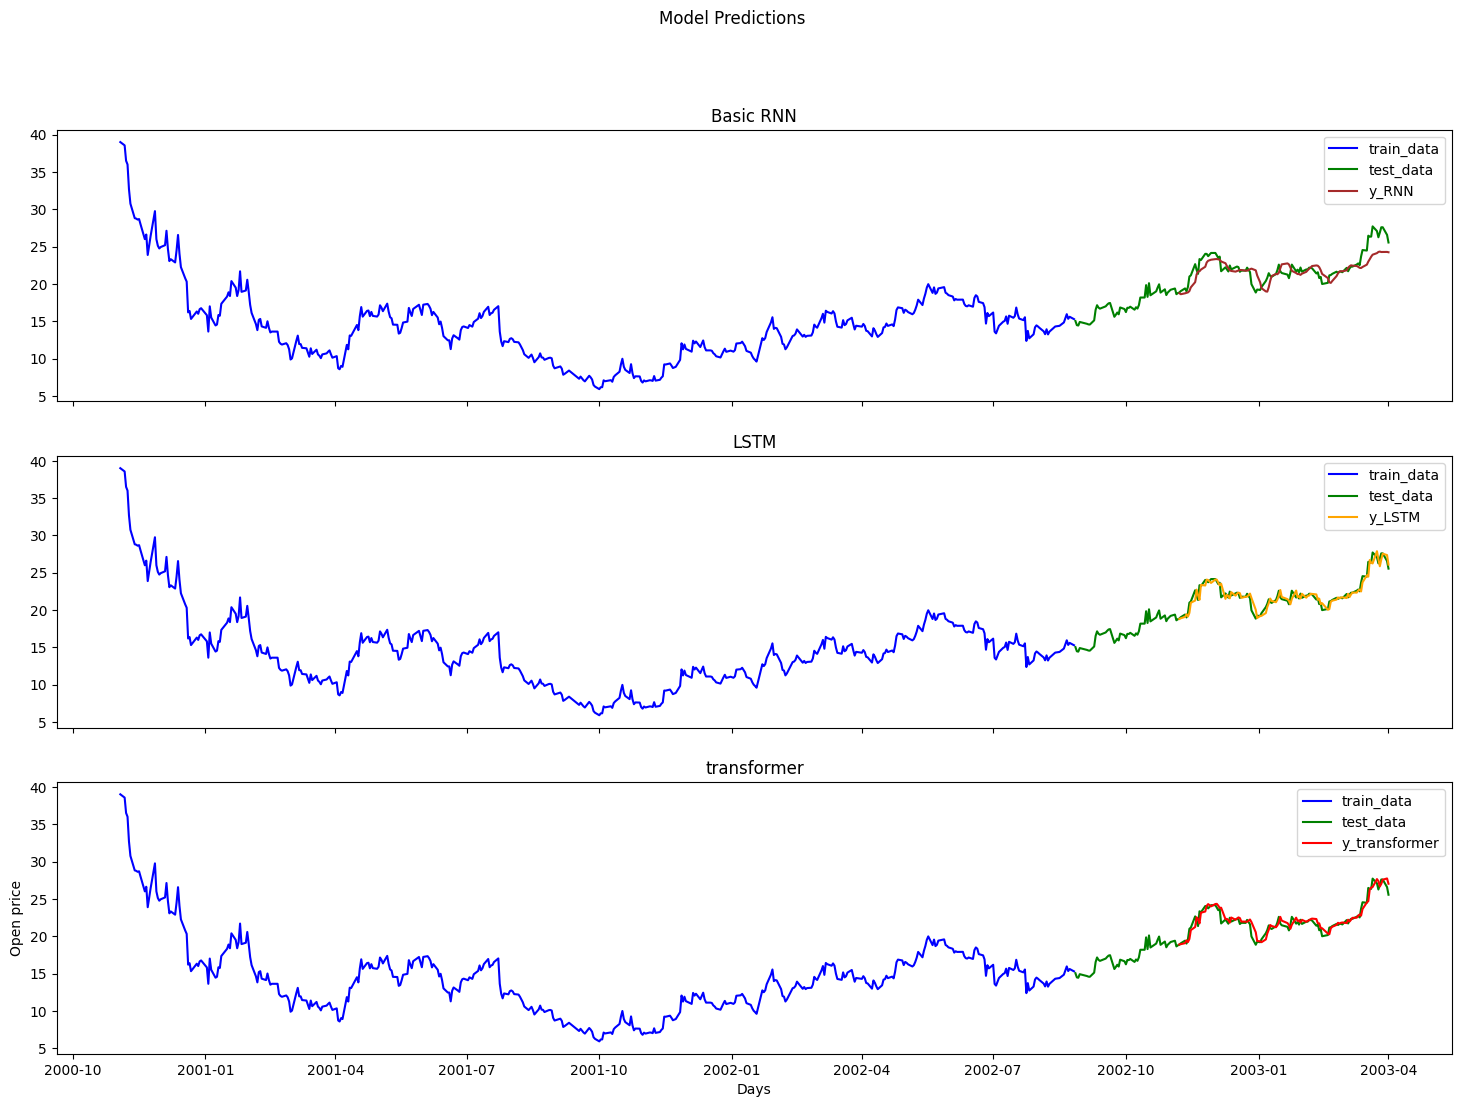

In [18]:
fig, axs = plt.subplots(3,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')

#Plot for RNN predictions
axs[0].plot(train_data.index[150:], train_data.Open[150:], label = "train_data", color = "b")
axs[0].plot(test_data.index, test_data.Open, label = "test_data", color = "g")
axs[0].plot(test_data.index[50:], y_RNN_O, label = "y_RNN", color = "brown")
axs[0].legend()
axs[0].title.set_text("Basic RNN")

#Plot for LSTM predictions
axs[1].plot(train_data.index[150:], train_data.Open[150:], label = "train_data", color = "b")
axs[1].plot(test_data.index, test_data.Open, label = "test_data", color = "g")
axs[1].plot(test_data.index[50:], y_LSTM_O, label = "y_LSTM", color = "orange")
axs[1].legend()
axs[1].title.set_text("LSTM")

#Plot for transformer predictions
axs[2].plot(train_data.index[150:], train_data.Open[150:], label = "train_data", color = "b")
axs[2].plot(test_data.index, test_data.Open, label = "test_data", color = "g")
axs[2].plot(test_data.index[50:], y_transformer_0, label = "y_transformer", color = "red")
axs[2].legend()
axs[2].title.set_text("transformer")

plt.xlabel("Days")
plt.ylabel("Open price")

plt.show()


In [21]:
print("hola")

hola


In [22]:
regressor.save('AMAZON_RNN.keras')
regressorLSTM.save('AMAZON_LSTM.keras')
transformer.save('AMAZON_TRANS.keras')

In [27]:
import mlflow
from keras.models import load_model
model = load_model("AMAZON_LSTM.keras")
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.keras.log_model(model, "AMAZON_LSTM")

2024/05/31 17:34:13 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
